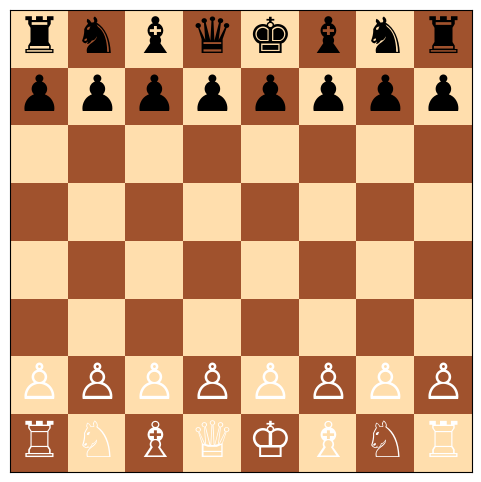

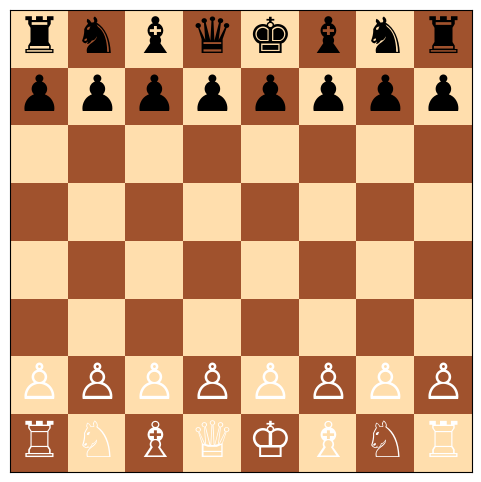

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import display, clear_output

class ChessGame:
    def __init__(self):
        self.board = np.zeros((8, 8), dtype=int)
        self.setup_board()
        self.turn = 1  # 1 for white, -1 for black
        self.selected_piece = None
        self.valid_moves = []
        self.game_over = False
        self.winner = None
        self.symbols = {
            0: ' ', 1: '♟', -1: '♙', 2: '♞', -2: '♘', 3: '♝', -3: '♗',
            4: '♜', -4: '♖', 5: '♛', -5: '♕', 6: '♚', -6: '♔'
        }
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.display_board()
    
    def setup_board(self):
        self.board[1, :] = 1
        self.board[6, :] = -1
        self.board[0, [0, 7]] = 4
        self.board[7, [0, 7]] = -4
        self.board[0, [1, 6]] = 2
        self.board[7, [1, 6]] = -2
        self.board[0, [2, 5]] = 3
        self.board[7, [2, 5]] = -3
        self.board[0, 3], self.board[7, 3] = 5, -5
        self.board[0, 4], self.board[7, 4] = 6, -6
    
    def select_piece(self, row, col):
        if self.game_over:
            return False
        piece = self.board[row, col]
        if (piece * self.turn) > 0:
            self.selected_piece = (row, col)
            self.valid_moves = self.calculate_valid_moves(row, col)
            self.display_board()
            return True
        elif self.selected_piece:
            self.move_piece(self.selected_piece[0], self.selected_piece[1], row, col)
            return True
        self.selected_piece = None
        self.valid_moves = []
        return False
    
    def calculate_valid_moves(self, row, col):
        piece = self.board[row, col]
        if abs(piece) == 1:
            return self.get_pawn_moves(row, col)
        return []  # Only pawns implemented for simplicity
    
    def get_pawn_moves(self, row, col):
        moves = []
        direction = 1 if self.board[row, col] > 0 else -1
        new_row = row + direction
        if 0 <= new_row < 8 and self.board[new_row, col] == 0:
            moves.append((new_row, col))
        return moves
    
    def move_piece(self, from_row, from_col, to_row, to_col):
        if (to_row, to_col) in self.valid_moves:
            self.board[to_row, to_col] = self.board[from_row, from_col]
            self.board[from_row, from_col] = 0
            self.turn *= -1
            self.selected_piece = None
            self.valid_moves = []
            self.display_board()
    
    def display_board(self):
        self.ax.clear()
        cmap = ListedColormap(['#FFDEAD', '#A0522D'])
        self.ax.imshow(np.add.outer(np.arange(8) % 2, np.arange(8) % 2) % 2, cmap=cmap)
        for i in range(8):
            for j in range(8):
                piece = self.board[i, j]
                if piece != 0:
                    self.ax.text(j, i, self.symbols[piece], fontsize=36, ha='center', va='center', color='black' if piece > 0 else 'white')
                if (i, j) in self.valid_moves:
                    self.ax.add_patch(plt.Circle((j, i), 0.3, color='blue', alpha=0.5))
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        clear_output(wait=True)
        display(self.fig)
    
    def handle_click(self, event):
        if event.xdata is None or event.ydata is None:
            return
        col, row = int(event.xdata), int(event.ydata)
        if 0 <= row < 8 and 0 <= col < 8:
            self.select_piece(row, col)
    
    def start_game(self):
        self.fig.canvas.mpl_connect('button_press_event', self.handle_click)

# Start game
game = ChessGame()
game.start_game()
